In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)

In [16]:
df = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/Cannabis-Predictions/balanced.csv')

In [17]:
df.head()

,Unnamed: 0,type1,name,type,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,no-dash,rating,None,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,thc,cbd
0,52,1,afpak,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,5,1,5,anonymous og,4.2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53,1,african,2,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,5,1,5,ape shit,3.9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,2,afternoon delight,2,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,5,4,6,apollo 13,4.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,0,afwreck,2,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,5,1,5,appalachia,4.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,57,2,agent orange,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,appalachian power,4.2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
columns = list(df.keys())
tastes = columns[40:-2]

In [19]:
for t in tastes:
    if t in df.columns:
        df.drop([t],axis='columns',inplace=True)

In [26]:
df.drop(columns=['type'], inplace=True)

In [27]:
df.rename(columns={'type1':'type'},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 41 columns):
type1               1583 non-null int64
name                1583 non-null object
type                1583 non-null int64
Relaxed             1583 non-null int64
Hungry              1583 non-null int64
Happy               1583 non-null int64
Sleepy              1583 non-null int64
Dizzy               1583 non-null int64
Depression          1583 non-null int64
Insomnia            1583 non-null int64
Pain                1583 non-null int64
Stress              1583 non-null int64
Lack of Appetite    1583 non-null int64
Euphoric            1583 non-null int64
Creative            1583 non-null int64
Energetic           1583 non-null int64
Talkative           1583 non-null int64
Dry Mouth           1583 non-null int64
Nausea              1583 non-null int64
Headache            1583 non-null int64
Uplifted            1583 non-null int64
Tingly              1583 non-null int64
Paranoid    

### Data Fun

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')

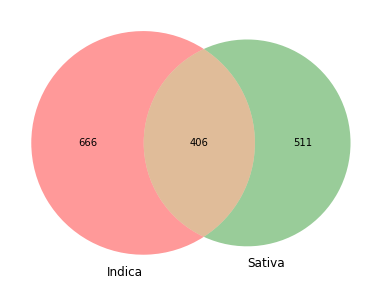

In [29]:
plt.figure(figsize=(10,5))
venn2(subsets=(len(df[df['type']==0]),len(df[df['type']==1]),len(df[df['type']==2])),set_labels=('Indica','Sativa'))

<Figure size 720x360 with 0 Axes>

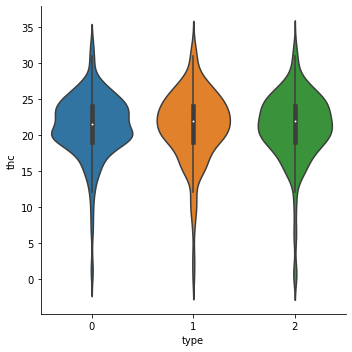

In [30]:
plt.figure(figsize=(10,5))
sns.catplot(x='type',y='thc',kind='violin',data=df)

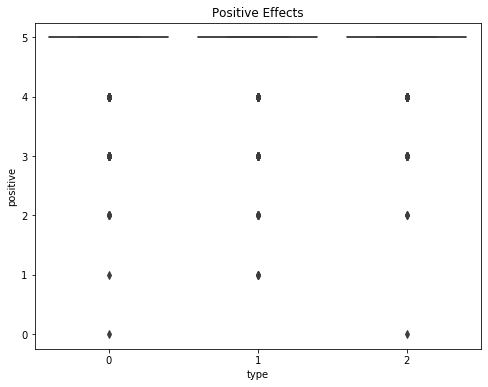

In [31]:
plt.figure(figsize=(8,6))
plt.title('Positive Effects')
sns.boxplot(x='type',y='positive',data=df)

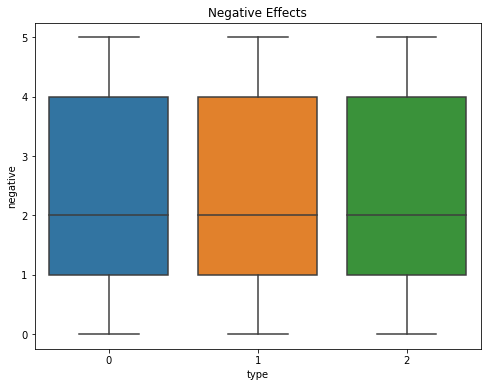

In [32]:
plt.figure(figsize=(8,6))
plt.title('Negative Effects')
sns.boxplot(x='type',y='negative',data=df)

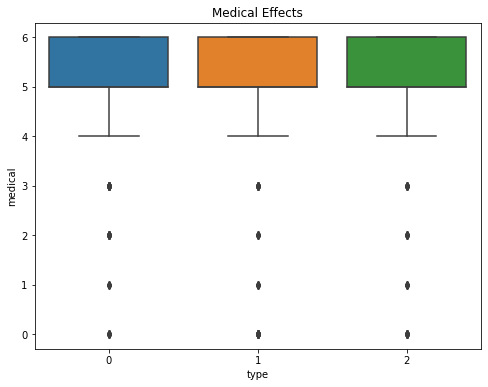

In [33]:
plt.figure(figsize=(8,6))
plt.title('Medical Effects')
sns.boxplot(x='type',y='medical',data=df)

Probability of Indica: 0.42072015161086546
Probability of Sativa: 0.3228048010107391
Probability of Hybrid: 0.25647504737839544


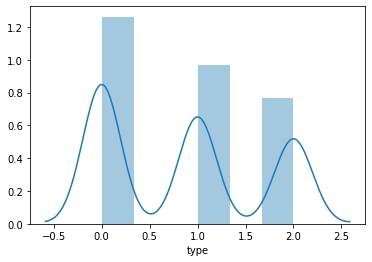

In [34]:
# class imbalance

indicadf=df[df['type']==0]
sativadf=df[df['type']==1]
hybriddf=df[df['type']==2]

sns.distplot(df['type'])
prind=len(indicadf)/len(df)
prsat=len(sativadf)/len(df)
prhyb=len(hybriddf)/len(df)
print('Probability of Indica: {}'.format(prind))
print('Probability of Sativa: {}'.format(prsat))
print('Probability of Hybrid: {}'.format(prhyb))

In [39]:
columns = list(df.keys())
columns

['type',
 'name',
 'Relaxed',
 'Hungry',
 'Happy',
 'Sleepy',
 'Dizzy',
 'Depression',
 'Insomnia',
 'Pain',
 'Stress',
 'Lack of Appetite',
 'Euphoric',
 'Creative',
 'Energetic',
 'Talkative',
 'Dry Mouth',
 'Nausea',
 'Headache',
 'Uplifted',
 'Tingly',
 'Paranoid',
 'Cramps',
 'Dry Eyes',
 'Fatigue',
 'Headaches',
 'Muscle Spasms',
 'Focused',
 'Eye Pressure',
 'Anxious',
 'Giggly',
 'Aroused',
 'Inflammation',
 'Spasticity',
 'Seizures',
 'positive',
 'negative',
 'medical',
 'thc',
 'cbd']

In [40]:
effects = columns[2:35]

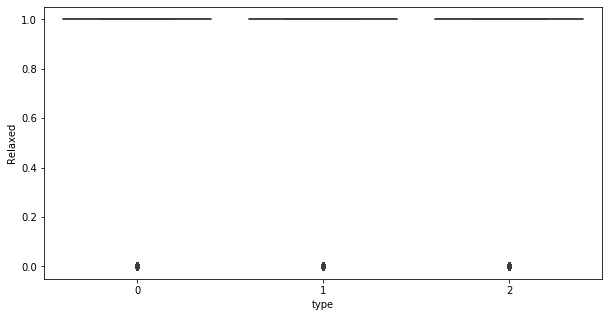

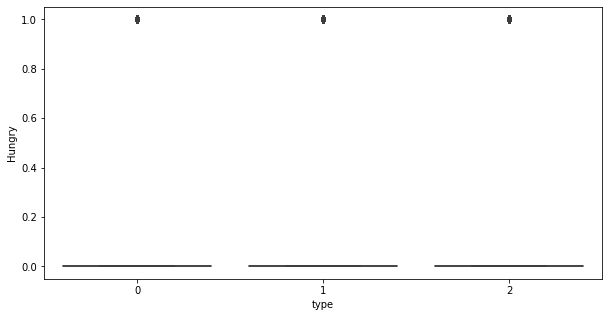

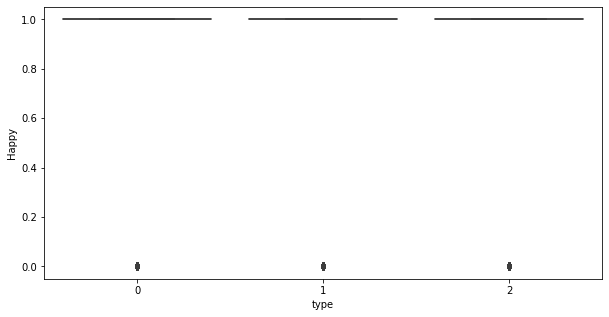

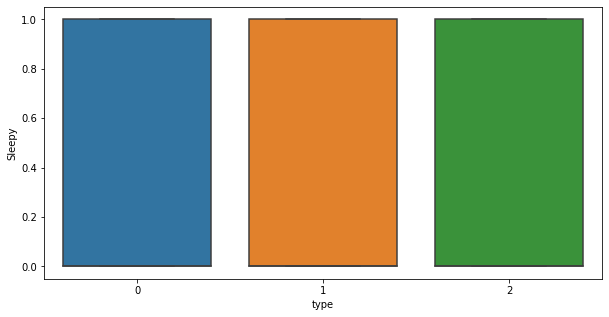

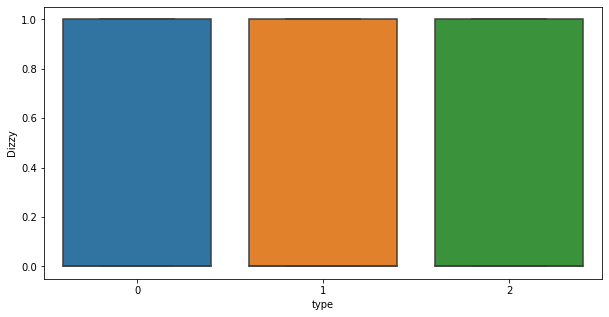

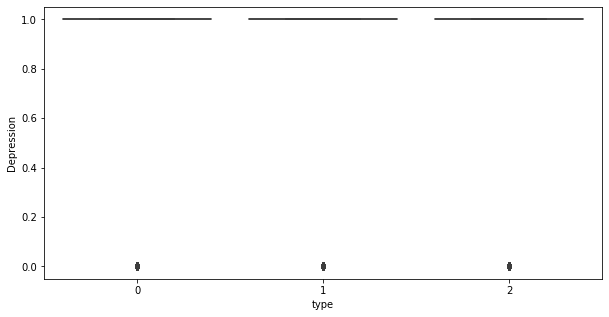

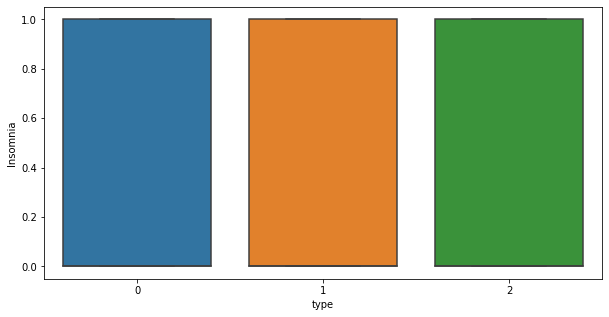

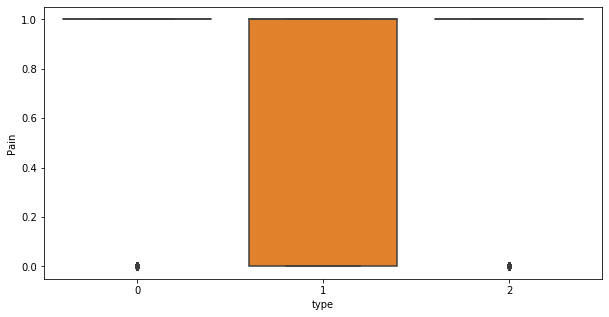

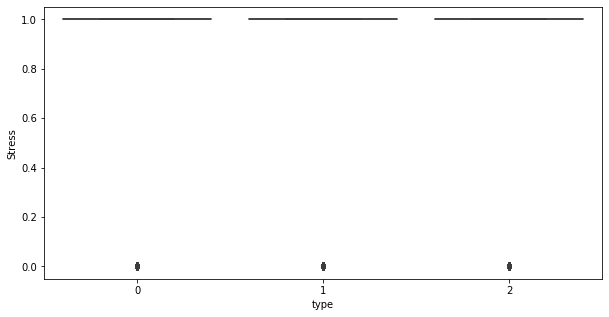

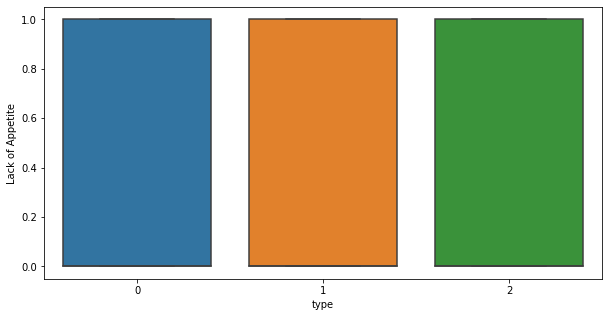

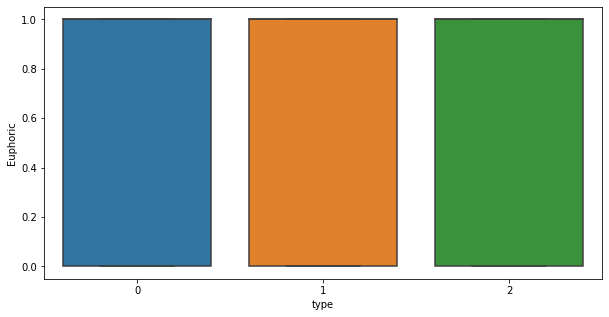

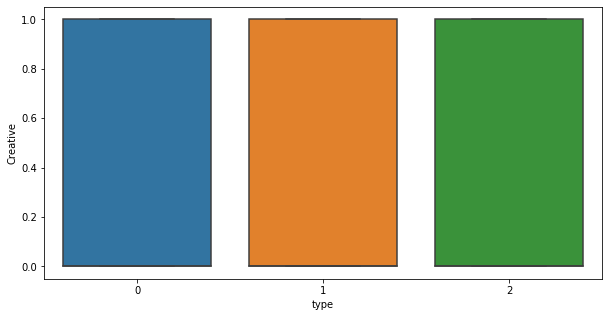

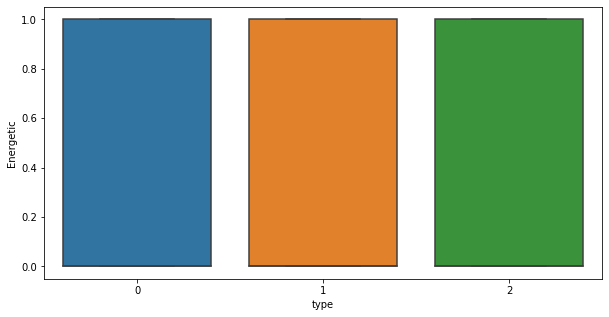

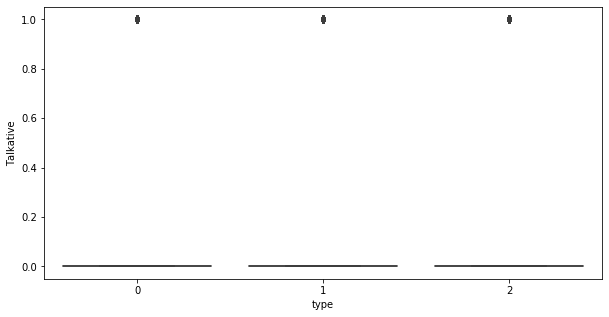

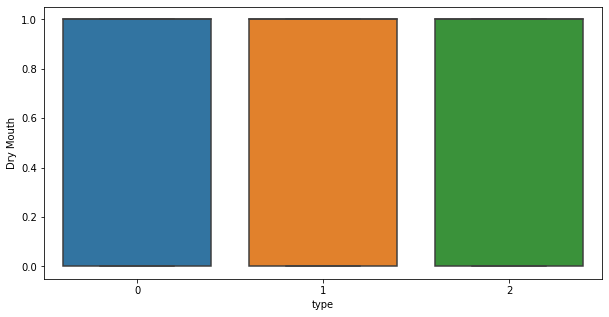

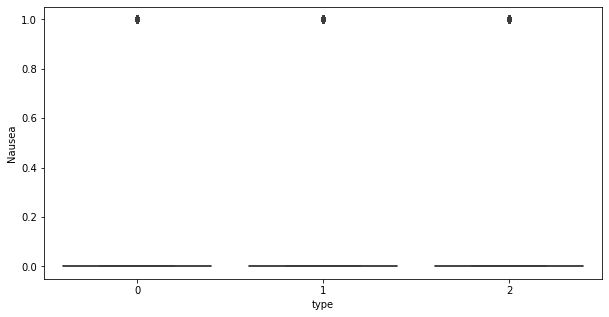

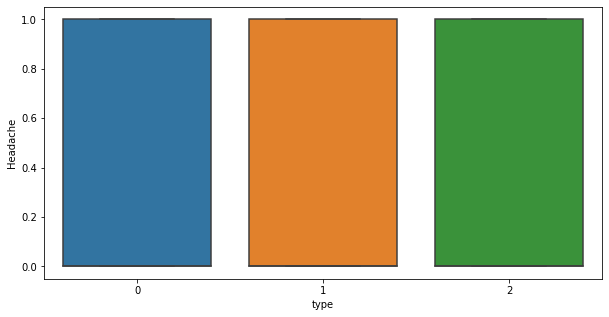

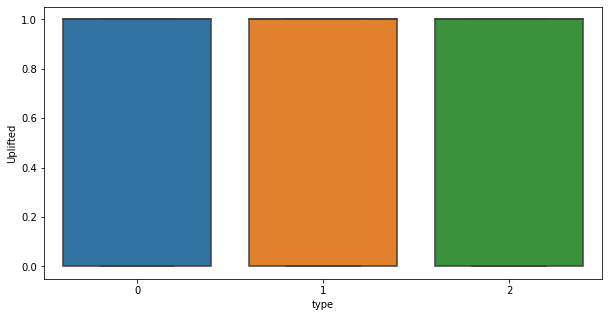

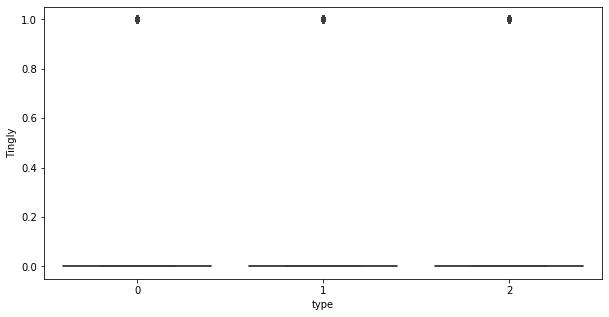

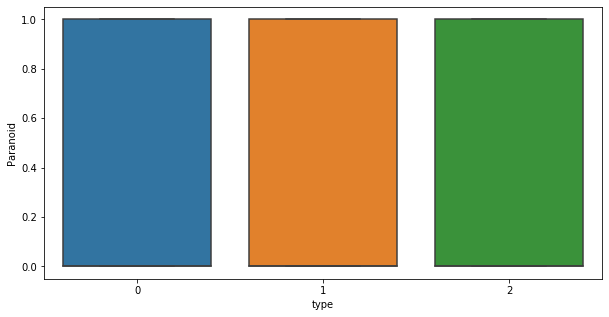

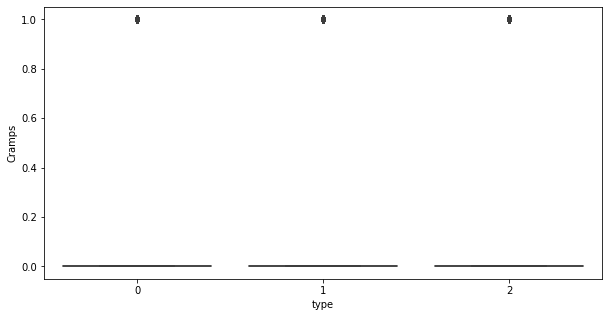

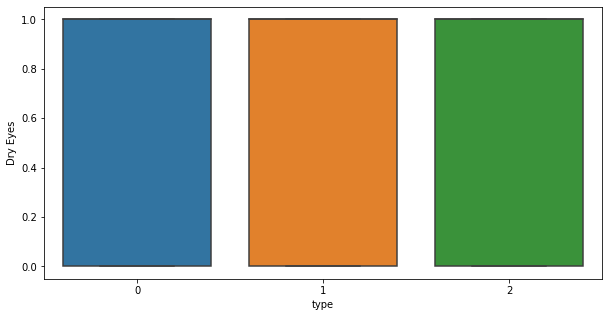

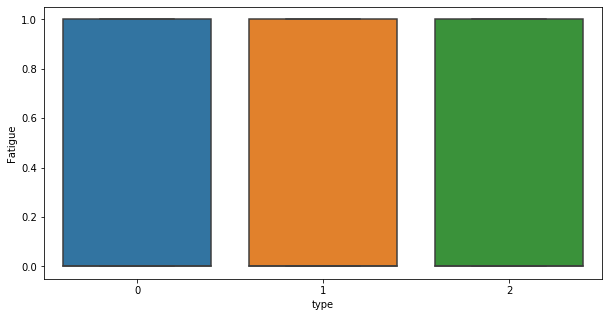

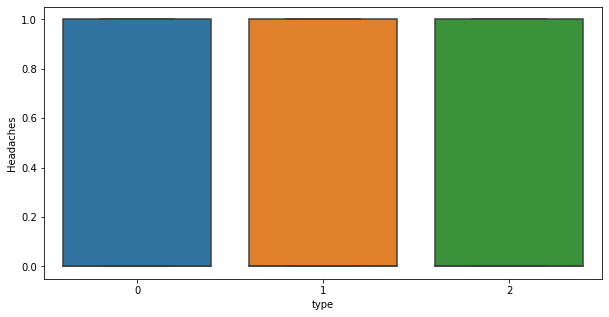

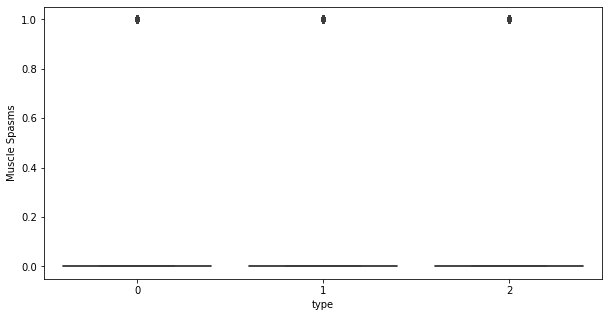

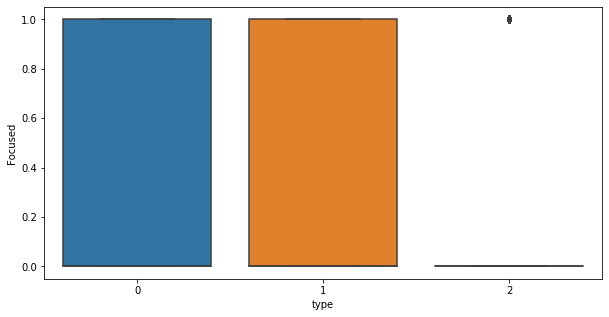

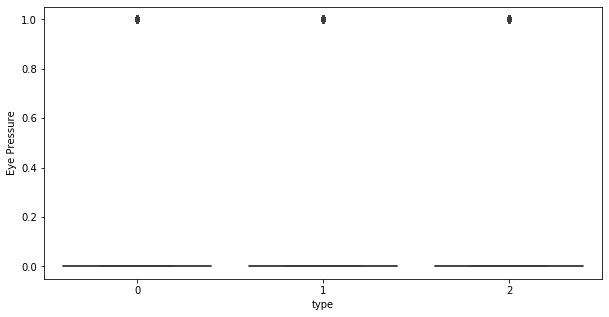

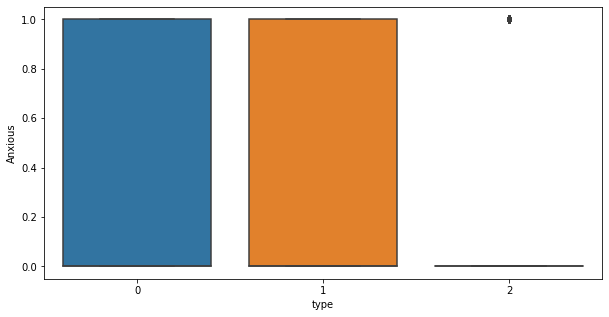

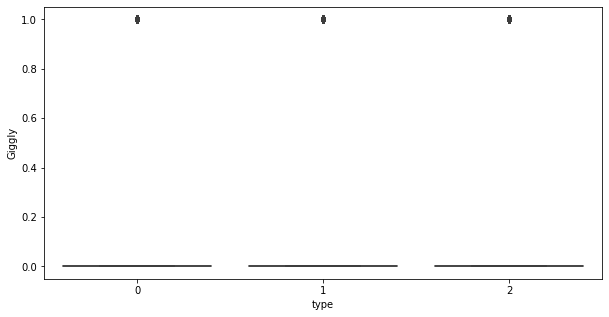

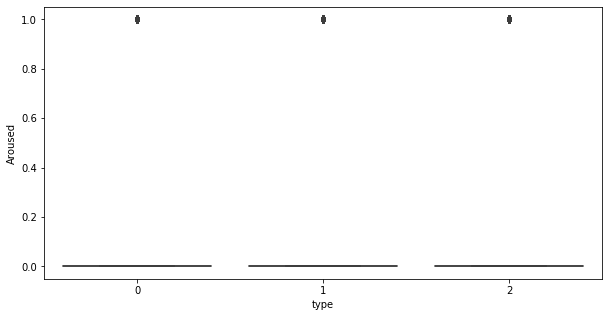

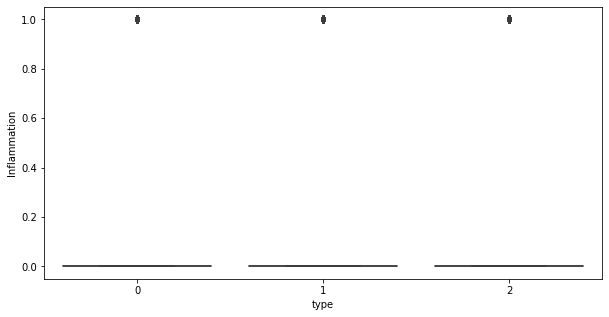

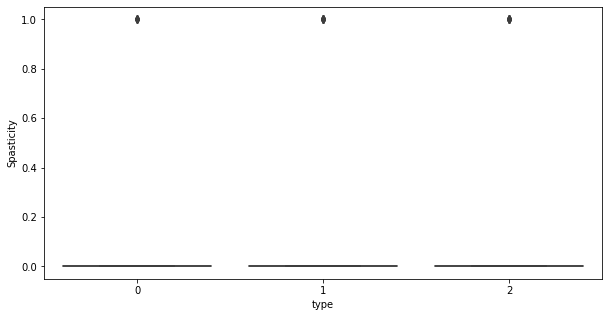

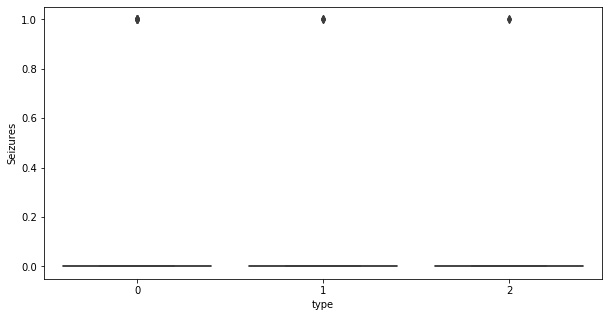

In [41]:
for e in effects:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='type',y=e,data=df)


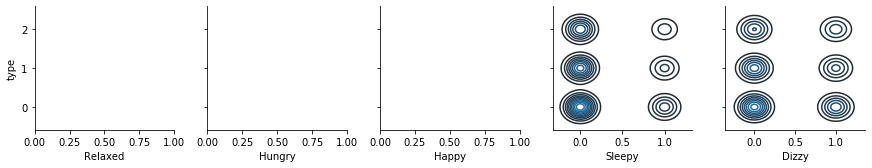

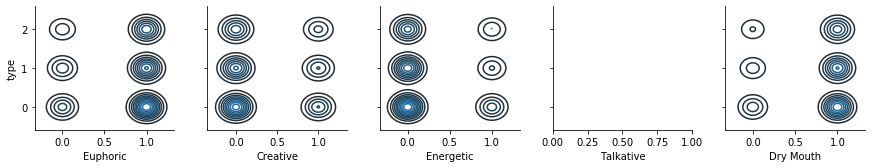

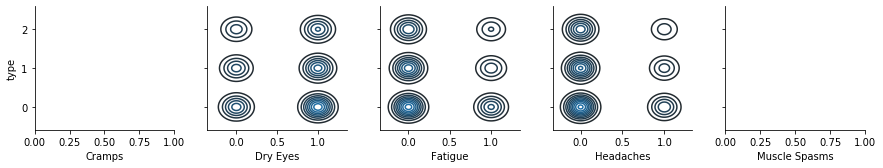

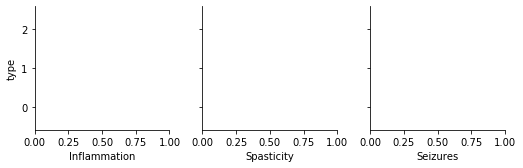

In [42]:
for i in range(0, 40, 10):
    g = sns.PairGrid(df,
                     x_vars = effects[i:i+5],
                     y_vars = ['type'])
    g = g.map(sns.kdeplot)

### Modeling Functions

In [43]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.metrics import auc, confusion_matrix, f1_score, roc_curve

In [44]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    print("Best Value for k: {}".format(best_k))
    print("Accuracy: {}".format(best_score))

In [45]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds,average=None)))
    print("Recall Score: {}".format(recall_score(test, preds,average=None)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds,average=None)))

In [46]:
def roc(classifier, X_train, X_test, y_train, y_test, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score=classifier.fit(X_train, y_train).predict(X_test)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [47]:
def plot_feature_importances(model,X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [48]:
def plot_corr_matrix(y_true,y_pred,classes,normalize=False,title=None,cmap=plt.cm.YlGn):
    #labels=['Sativa','Indica','Hybrid']
    cmat=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm=confusion_matrix(y_true,y_pred)
    fig, ax =plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Implementation

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve
from sklearn.metrics import auc, classification_report, confusion_matrix
from sklearn import tree, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.externals.six import StringIO 
# import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA  
from sklearn.linear_model import LogisticRegression

In [50]:
#Train Test Split
features=df.drop(columns=['name','type'])
trainn=df.drop(columns=['name'])
selectedfeatures=['thc','cbd','Relaxed','Hungry','Sleepy','Depression','Insomnia','Pain','Euphoric','Creative','Energetic','Dry Mouth','Nausea','Uplifted','Fatigue','Focused']
# target=label_binarize(df.type,classes=[0,1,2])
target=df.type
# n_classes=target.shape[1]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=42)
trainx=X_train[selectedfeatures]
testx=X_test[selectedfeatures]

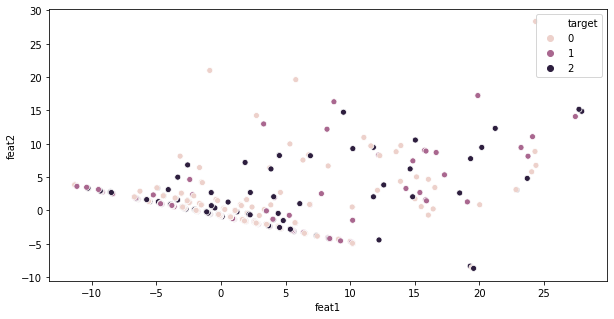

In [52]:
#PCA
pca = PCA()
features=df.drop(columns=['name'])
transformed = pca.fit_transform(features)
pca.components_
pcadict={'feat1':transformed[:,0],'feat2':transformed[:,1]}
pcadf=pd.DataFrame(pcadict)
pcadf['target']=df['type']
pcadf.head()
plt.figure(figsize=(10,5))
sns.scatterplot(x='feat1',y='feat2',hue='target',data=pcadf)

pca.mean_
featurespca=pcadf.drop(columns='target')
targetpca=pcadf.target
Xptrain, Xptest, yptrain, yptest = train_test_split(featurespca, targetpca, test_size=0.25,random_state=42)

In [53]:
#Scale Training Features
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

Baseline Model Metrics:
Precision Score: [0.44444444 0.         0.        ]
Recall Score: [1. 0. 0.]
Accuracy Score: 0.4444444444444444
F1 Score: [0.61538462 0.         0.        ]
Predicted    0  All
True               
0          176  176
1          121  121
2           99   99
All        396  396
              precision    recall  f1-score   support

      indica       0.44      1.00      0.62       176
      sativa       0.00      0.00      0.00       121
      hybrid       0.00      0.00      0.00        99

    accuracy                           0.44       396
   macro avg       0.15      0.33      0.21       396
weighted avg       0.20      0.44      0.27       396



<Figure size 720x432 with 0 Axes>

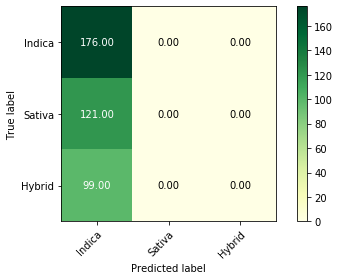

In [54]:
#Dummy Model (accuracy: 0.53)
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

dummy.fit(scaled_data_train, y_train)
basepreds=dummy.predict(scaled_data_test)
sc=dummy.score(scaled_data_test, y_test) 
print("Baseline Model Metrics:")
print_metrics(y_test,basepreds)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,basepreds,['Indica','Sativa','Hybrid'],'Baseline')
print(classification_report(y_test,basepreds,target_names=['indica','sativa','hybrid']))


Precision Score: [0.44160584 0.26136364 0.32352941]
Recall Score: [0.6875     0.19008264 0.11111111]
Accuracy Score: 0.39141414141414144
F1 Score: [0.53777778 0.22009569 0.16541353]
Predicted    0   1   2  All
True                       
0          121  43  12  176
1           87  23  11  121
2           66  22  11   99
All        274  88  34  396
              precision    recall  f1-score   support

      indica       0.44      0.69      0.54       176
      sativa       0.26      0.19      0.22       121
      hybrid       0.32      0.11      0.17        99

    accuracy                           0.39       396
   macro avg       0.34      0.33      0.31       396
weighted avg       0.36      0.39      0.35       396



<Figure size 720x432 with 0 Axes>

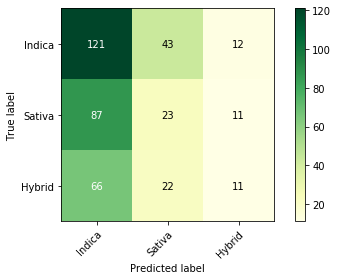

In [55]:
#Logistic Regression Baseline(Accuracy: 0.58)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(scaled_data_train, y_train)
y_pred=model_log.predict(scaled_data_test)
print_metrics(y_test,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))

Precision Score: [0.43425076 0.30769231 0.25      ]
Recall Score: [0.80681818 0.16528926 0.01010101]
Accuracy Score: 0.4116161616161616
F1 Score: [0.56461233 0.21505376 0.01941748]
Predicted    0   1  2  All
True                      
0          142  33  1  176
1           99  20  2  121
2           86  12  1   99
All        327  65  4  396
              precision    recall  f1-score   support

      indica       0.43      0.81      0.56       176
      sativa       0.31      0.17      0.22       121
      hybrid       0.25      0.01      0.02        99

    accuracy                           0.41       396
   macro avg       0.33      0.33      0.27       396
weighted avg       0.35      0.41      0.32       396



<Figure size 720x432 with 0 Axes>

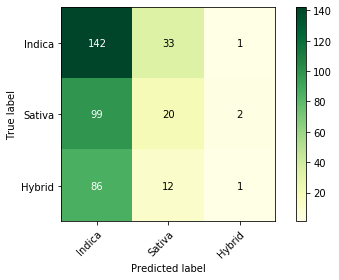

In [56]:
#Logistic Regression With Selected Features (accuracy: 0.63)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(trainx, y_train)
y_pred=model_log.predict(testx)
print_metrics(yptest,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))

Precision Score: [0.         0.         0.52525253]
Recall Score: [0. 0. 1.]
Accuracy Score: 0.5252525252525253
F1 Score: [0.         0.         0.68874172]
Predicted    2  All
True               
0          111  111
1           77   77
2          208  208
All        396  396
              precision    recall  f1-score   support

      indica       0.00      0.00      0.00       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.53      1.00      0.69       208

    accuracy                           0.53       396
   macro avg       0.18      0.33      0.23       396
weighted avg       0.28      0.53      0.36       396



<Figure size 720x432 with 0 Axes>

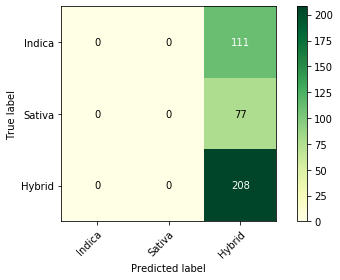

In [121]:
#Logistic Regression with PCA (Accuracy: 0.53)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(Xptrain, yptrain)
y_pred=model_log.predict(Xptest)
print_metrics(yptest,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(yptest,y_pred,target_names=['indica','sativa','hybrid']))


Precision Score: [0.42857143 0.27819549 0.30434783]
Recall Score: [0.52840909 0.30578512 0.14141414]
Accuracy Score: 0.36363636363636365
F1 Score: [0.47328244 0.29133858 0.19310345]
              precision    recall  f1-score   support

      indica       0.43      0.53      0.47       176
      sativa       0.28      0.31      0.29       121
      hybrid       0.30      0.14      0.19        99

    accuracy                           0.36       396
   macro avg       0.34      0.33      0.32       396
weighted avg       0.35      0.36      0.35       396

Predicted    0    1   2  All
True                        
0           93   62  21  176
1           73   37  11  121
2           51   34  14   99
All        217  133  46  396


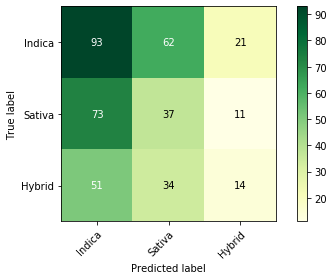

In [57]:
#KNN Baseline (Accuracy: 0.52)
clf1 = KNeighborsClassifier()
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Precision Score: [0.49324324 0.40322581 0.59139785]
Recall Score: [0.65765766 0.32467532 0.52884615]
Accuracy Score: 0.5252525252525253
F1 Score: [0.56370656 0.35971223 0.55837563]
              precision    recall  f1-score   support

      indica       0.49      0.66      0.56       111
      sativa       0.40      0.32      0.36        77
      hybrid       0.59      0.53      0.56       208

    accuracy                           0.53       396
   macro avg       0.50      0.50      0.49       396
weighted avg       0.53      0.53      0.52       396

Predicted    0   1    2  All
True                        
0           73   6   32  111
1            8  25   44   77
2           67  31  110  208
All        148  62  186  396


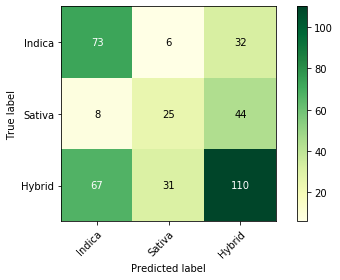

In [123]:
#KNN With Selected Features (Accuracy: 0.55)
clf1 = KNeighborsClassifier()
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
confusion_matrix(test_preds,y_test)
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])


Precision Score: [0.66371681 0.34545455 0.71491228]
Recall Score: [0.67567568 0.24675325 0.78365385]
Accuracy Score: 0.648989898989899
F1 Score: [0.66964286 0.28787879 0.74770642]
              precision    recall  f1-score   support

      indica       0.66      0.68      0.67       111
      sativa       0.35      0.25      0.29        77
      hybrid       0.71      0.78      0.75       208

    accuracy                           0.65       396
   macro avg       0.57      0.57      0.57       396
weighted avg       0.63      0.65      0.64       396

Predicted    0   1    2  All
True                        
0           75  14   22  111
1           15  19   43   77
2           23  22  163  208
All        113  55  228  396


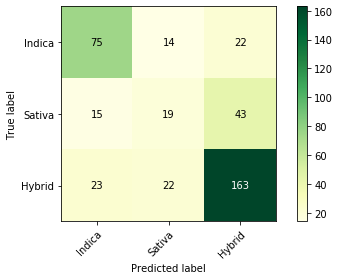

In [124]:
#KNN With PCA (Accuracy: 0.64)
clf1 = KNeighborsClassifier()
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
print(classification_report(yptest,test_preds,target_names=['indica','sativa','hybrid']))
confusion_matrix(test_preds,yptest)
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Best Value for k: 21
Accuracy: 0.6313131313131313
Precision Score: [0.60550459 0.73913043 0.60606061]
Recall Score: [0.59459459 0.22077922 0.76923077]
Accuracy Score: 0.6136363636363636
F1 Score: [0.6       0.34      0.6779661]
              precision    recall  f1-score   support

      indica       0.61      0.59      0.60       111
      sativa       0.74      0.22      0.34        77
      hybrid       0.61      0.77      0.68       208

    accuracy                           0.61       396
   macro avg       0.65      0.53      0.54       396
weighted avg       0.63      0.61      0.59       396

Predicted    0   1    2  All
True                        
0           66   0   45  111
1            1  17   59   77
2           42   6  160  208
All        109  23  264  396


<Figure size 720x360 with 0 Axes>

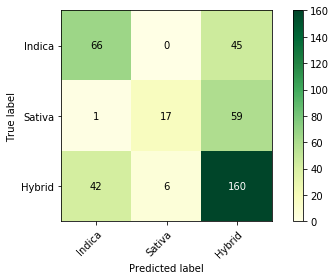

In [125]:
#Getting best KNN model (k=23, accuracy: 0.57)
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
clf1 = KNeighborsClassifier(n_neighbors=23)
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Best Value for k: 21
Accuracy: 0.5984848484848485
Precision Score: [0.6036036  0.68181818 0.60456274]
Recall Score: [0.6036036  0.19480519 0.76442308]
Accuracy Score: 0.6085858585858586
F1 Score: [0.6036036  0.3030303  0.67515924]
Mean Cross Validation Score: 59.48%
              precision    recall  f1-score   support

      indica       0.60      0.60      0.60       111
      sativa       0.68      0.19      0.30        77
      hybrid       0.60      0.76      0.68       208

    accuracy                           0.61       396
   macro avg       0.63      0.52      0.53       396
weighted avg       0.62      0.61      0.58       396

Predicted    0   1    2  All
True                        
0           67   0   44  111
1            2  15   60   77
2           42   7  159  208
All        111  22  263  396


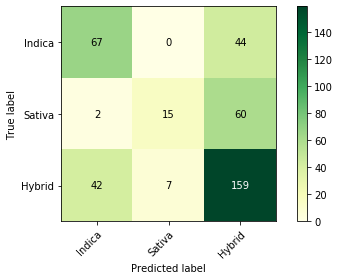

In [126]:
#Finding best k with selected features (k=40, accuracy: .60)
find_best_k(trainx, y_train, testx, y_test)
clf1 = KNeighborsClassifier(n_neighbors=40)
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Best Value for k: 1
Accuracy: 0.6994949494949495
Precision Score: [0.73214286 0.4125     0.79411765]
Recall Score: [0.73873874 0.42857143 0.77884615]
Accuracy Score: 0.6994949494949495
F1 Score: [0.73542601 0.42038217 0.78640777]
Mean Cross Validation Score: 66.22%
              precision    recall  f1-score   support

      indica       0.73      0.74      0.74       111
      satica       0.41      0.43      0.42        77
      hybrid       0.79      0.78      0.79       208

    accuracy                           0.70       396
   macro avg       0.65      0.65      0.65       396
weighted avg       0.70      0.70      0.70       396

Predicted    0   1    2  All
True                        
0           82  17   12  111
1           14  33   30   77
2           16  30  162  208
All        112  80  204  396


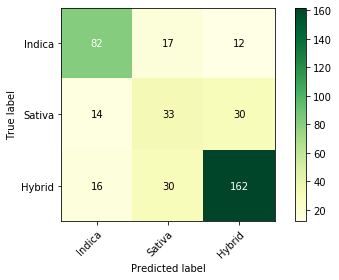

In [127]:
#Finding best k with PCA (k=1 accuracy: 0.66)
find_best_k(Xptrain, yptrain, Xptest, yptest)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(yptest,test_preds,['Indica','Sativa','Hybrid'])

In [128]:
#Grid Search for KNN (k=30, weights=uniform, accuracy: 0.5232)
model=KNeighborsClassifier()
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))


Mean Cross Validation Score: 54.67%


Mean Cross Validation Score: 57.12%
Mean Training Score: 83.95%
Mean Testing Score: 61.11%
Best Parameter Combination Found During Grid Search:
Precision Score: [0.59633028 0.77272727 0.60377358]
Recall Score: [0.58558559 0.22077922 0.76923077]
Accuracy Score: 0.6111111111111112
F1 Score: [0.59090909 0.34343434 0.67653277]
Mean Cross Validation Score: 61.75%
              precision    recall  f1-score   support

      indica       0.60      0.59      0.59       111
      satica       0.77      0.22      0.34        77
      hybrid       0.60      0.77      0.68       208

    accuracy                           0.61       396
   macro avg       0.66      0.53      0.54       396
weighted avg       0.63      0.61      0.59       396

Predicted    0   1    2  All
True                        
0           65   0   46  111
1            1  17   59   77
2           43   5  160  208
All        109  22  265  396


<Figure size 720x360 with 0 Axes>

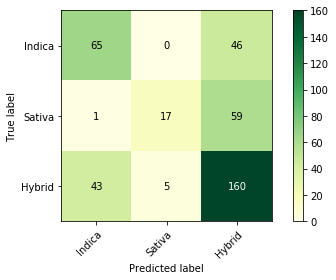

In [129]:
#Grid Search for KNN with selected features (k=28, uniform, accuracy: 0.6628)
dt_cv_score=cross_val_score(model, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))


dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
clf1 = KNeighborsClassifier(n_neighbors=30, weights='uniform')
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

<Figure size 720x360 with 0 Axes>

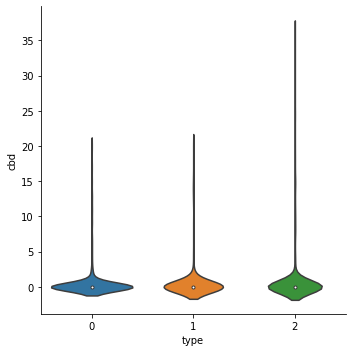

In [130]:
plt.figure(figsize=(10,5))
sns.catplot(x='type',y='cbd',kind='violin',data=df)

In [131]:
# dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
# dt_gs_testing_score = dt_grid_search.score(testx, y_test)

# print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
# print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))

ValueError: query data dimension must match training data dimension

Best Parameter Combination Found During Grid Search:
Precision Score: [0.5862069  0.65517241 0.60956175]
Recall Score: [0.61261261 0.24675325 0.73557692]
Accuracy Score: 0.6060606060606061
F1 Score: [0.59911894 0.35849057 0.66666667]
Mean Cross Validation Score: 58.64%
              precision    recall  f1-score   support

      indica       0.59      0.61      0.60       111
      sativa       0.66      0.25      0.36        77
      hybrid       0.61      0.74      0.67       208

    accuracy                           0.61       396
   macro avg       0.62      0.53      0.54       396
weighted avg       0.61      0.61      0.59       396

Predicted    0   1    2  All
True                        
0           68   0   43  111
1            3  19   55   77
2           45  10  153  208
All        116  29  251  396


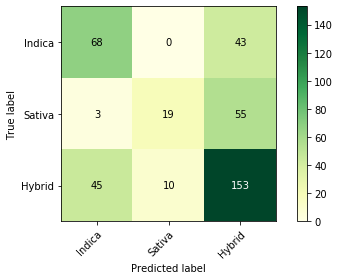

In [132]:
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
clf1 = KNeighborsClassifier(n_neighbors=28, weights='uniform')
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 62.26%
Mean Training Score: 84.11%
Mean Testing Score: 69.95%
Best Parameter Combination Found During Grid Search:
Precision Score: [0.74226804 0.42       0.69879518]
Recall Score: [0.64864865 0.27272727 0.83653846]
Accuracy Score: 0.6742424242424242
F1 Score: [0.69230769 0.33070866 0.76148796]
Mean Cross Validation Score: 66.05%
              precision    recall  f1-score   support

      indica       0.74      0.65      0.69       111
      satica       0.42      0.27      0.33        77
      hybrid       0.70      0.84      0.76       208

    accuracy                           0.67       396
   macro avg       0.62      0.59      0.59       396
weighted avg       0.66      0.67      0.66       396

Predicted   0   1    2  All
True                       
0          72  11   28  111
1           9  21   47   77
2          16  18  174  208
All        97  50  249  396


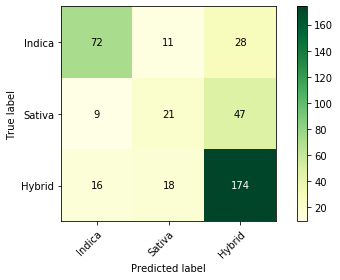

In [133]:
#Grid search with PCA(k=28,distance, accuracy: 0.674)
dt_cv_score=cross_val_score(model, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(Xptrain, yptrain)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(Xptest, yptest)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
clf1 = KNeighborsClassifier(n_neighbors=10,weights='distance')
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(yptest,test_preds,['Indica','Sativa','Hybrid'])


In [134]:
#Decision Tree Baseline (accuracy: 0.530)
classifier1 = DecisionTreeClassifier()  
classifier1.fit(scaled_data_train, y_train) 
y_pred = classifier1.predict(scaled_data_test)
y_score = classifier1.score(scaled_data_test, y_test)
print('Accuracy: ', y_score)

Accuracy:  0.5252525252525253


In [135]:
# Compute the average precision score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

Micro-averaged precision score: 0.53
Macro-averaged precision score: 0.51


Per-class precision score: [0.58558559 0.4025974  0.53846154]
Precision Score: [0.49242424 0.45588235 0.57142857]
Recall Score: [0.58558559 0.4025974  0.53846154]
Accuracy Score: 0.5252525252525253
F1 Score: [0.53497942 0.42758621 0.55445545]
              precision    recall  f1-score   support

      indica       0.49      0.59      0.53       111
      satica       0.46      0.40      0.43        77
      hybrid       0.57      0.54      0.55       208

    accuracy                           0.53       396
   macro avg       0.51      0.51      0.51       396
weighted avg       0.53      0.53      0.52       396

Predicted    0   1    2  All
True                        
0           65   4   42  111
1            4  31   42   77
2           63  33  112  208
All        132  68  196  396


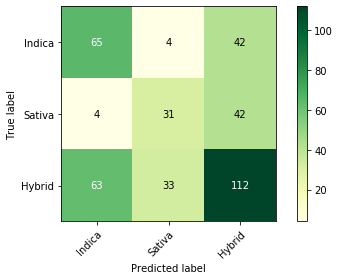

In [136]:
per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

In [137]:
#Decision Tree with selected features (accuracy:0.505)
classifier2 = DecisionTreeClassifier()  
classifier2.fit(trainx, y_train) 
y_pred = classifier2.predict(testx)
y_score = classifier2.score(testx, y_test)
print('Accuracy: ', y_score)

Accuracy:  0.5227272727272727


In [138]:
# Compute the average precision score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

Micro-averaged precision score: 0.52
Macro-averaged precision score: 0.51


Per-class precision score: [0.65765766 0.37662338 0.50480769]
Precision Score: [0.5177305  0.37662338 0.58988764]
Recall Score: [0.65765766 0.37662338 0.50480769]
Accuracy Score: 0.5227272727272727
F1 Score: [0.57936508 0.37662338 0.54404145]
              precision    recall  f1-score   support

      indica       0.52      0.66      0.58       111
      sativa       0.38      0.38      0.38        77
      hybrid       0.59      0.50      0.54       208

    accuracy                           0.52       396
   macro avg       0.49      0.51      0.50       396
weighted avg       0.53      0.52      0.52       396

Predicted    0   1    2  All
True                        
0           73   9   29  111
1            4  29   44   77
2           64  39  105  208
All        141  77  178  396


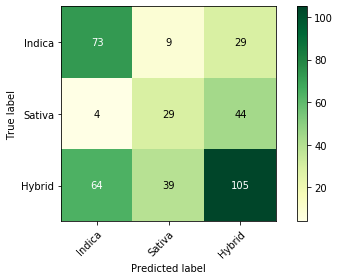

In [140]:
per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))
# roc(classifier1,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

In [141]:
#Decision Tree with PCA (accuracy: 0.6162)
classifier1.fit(Xptrain, yptrain) 
y_pred = classifier1.predict(Xptest)
y_score = classifier1.score(Xptest, yptest)
print('Accuracy: ', y_score)

Accuracy:  0.5984848484848485


Micro-averaged precision score: 0.60
Macro-averaged precision score: 0.55
Per-class precision score: [0.59459459 0.36363636 0.6875    ]
Precision Score: [0.56410256 0.3255814  0.74093264]
Recall Score: [0.59459459 0.36363636 0.6875    ]
Accuracy Score: 0.5984848484848485
F1 Score: [0.57894737 0.34355828 0.71321696]
              precision    recall  f1-score   support

      indica       0.56      0.59      0.58       111
      satica       0.33      0.36      0.34        77
      hybrid       0.74      0.69      0.71       208

    accuracy                           0.60       396
   macro avg       0.54      0.55      0.55       396
weighted avg       0.61      0.60      0.60       396

Predicted    0   1    2  All
True                        
0           66  22   23  111
1           22  28   27   77
2           29  36  143  208
All        117  86  193  396


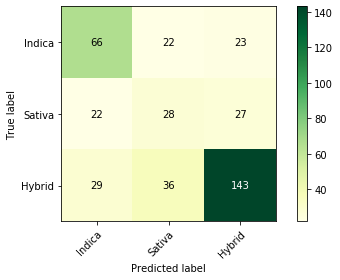

In [142]:
# Compute the average precision score
micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier1,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 53.49%
Mean Training Score: 68.44%
Mean Testing Score: 61.11%
Best Parameter Combination Found During Grid Search:
Accuracy is: 0.601010101010101
Micro-averaged precision score: 0.60
Macro-averaged precision score: 0.48
Per-class precision score: [0.6036036  0.         0.82211538]
Precision Score: [0.64423077 0.         0.58561644]
Recall Score: [0.6036036  0.         0.82211538]
Accuracy Score: 0.601010101010101
F1 Score: [0.62325581 0.         0.684     ]
              precision    recall  f1-score   support

      indica       0.64      0.60      0.62       111
      satica       0.00      0.00      0.00        77
      hybrid       0.59      0.82      0.68       208

    accuracy                           0.60       396
   macro avg       0.41      0.48      0.44       396
weighted avg       0.49      0.60      0.53       396

Predicted    0    2  All
True                    
0           67   44  111
1            0   77   77
2           37  171  208
All

<Figure size 720x360 with 0 Axes>

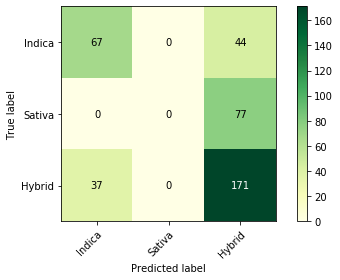

In [143]:
#Grid search Decision Tree: All features (criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2, accuracy: 0.6483)
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)  
classifier3.fit(scaled_data_train, y_train) 

y_pred = classifier3.predict(scaled_data_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 52.74%
Mean Training Score: 67.51%
Mean Testing Score: 62.63%
Best Parameter Combination Found During Grid Search:
Accuracy is: 0.601010101010101
Micro-averaged precision score: 0.60
Macro-averaged precision score: 0.48
Per-class precision score: [0.6036036  0.         0.82211538]
Precision Score: [0.64423077 0.         0.58561644]
Recall Score: [0.6036036  0.         0.82211538]
Accuracy Score: 0.601010101010101
F1 Score: [0.62325581 0.         0.684     ]
              precision    recall  f1-score   support

      indica       0.64      0.60      0.62       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.59      0.82      0.68       208

    accuracy                           0.60       396
   macro avg       0.41      0.48      0.44       396
weighted avg       0.49      0.60      0.53       396

Predicted    0    2  All
True                    
0           67   44  111
1            0   77   77
2           37  171  208
All

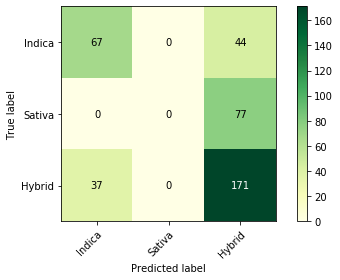

In [144]:
#Grid search decision tree with selected features (criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2, accuracy: 0.6483)
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(trainx, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(testx, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)  
classifier3.fit(trainx, y_train) 
y_pred = classifier3.predict(testx)
acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 62.26%
Mean Training Score: 60.08%
Mean Testing Score: 64.14%
Best Parameter Combination Found During Grid Search:
Accuracy is: 0.5404040404040404
Micro-averaged precision score: 0.54
Macro-averaged precision score: 0.36
Per-class precision score: [0.12612613 0.         0.96153846]
Precision Score: [0.63636364 0.         0.53475936]
Recall Score: [0.12612613 0.         0.96153846]
Accuracy Score: 0.5404040404040404
F1 Score: [0.21052632 0.         0.68728522]
              precision    recall  f1-score   support

      indica       0.64      0.13      0.21       111
      satica       0.00      0.00      0.00        77
      hybrid       0.53      0.96      0.69       208

    accuracy                           0.54       396
   macro avg       0.39      0.36      0.30       396
weighted avg       0.46      0.54      0.42       396

Predicted   0    2  All
True                   
0          14   97  111
1           0   77   77
2           8  200  208
All   

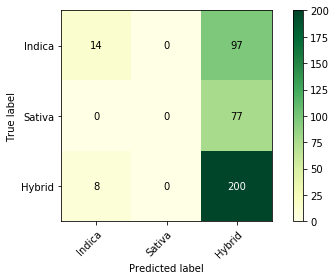

In [145]:
#Grid search decision tree with PCA (criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2, accuracy: 0.5581)
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(Xptrain, yptrain)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(Xptest, yptest)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)  
classifier3.fit(Xptrain, yptrain) 
y_pred = classifier3.predict(Xptest)
acc = accuracy_score(yptest,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])


Precision Score: [0.55855856 0.41558442 0.51923077]
Recall Score: [0.47692308 0.43835616 0.55958549]
Accuracy Score: 0.51010101010101
F1 Score: [0.51452282 0.42666667 0.53865337]
              precision    recall  f1-score   support

      indica       0.48      0.56      0.51       111
      satica       0.44      0.42      0.43        77
      hybrid       0.56      0.52      0.54       208

    accuracy                           0.51       396
   macro avg       0.49      0.50      0.49       396
weighted avg       0.51      0.51      0.51       396

Predicted    0   1    2  All
True                        
0           62   4   45  111
1            5  32   40   77
2           63  37  108  208
All        130  73  193  396


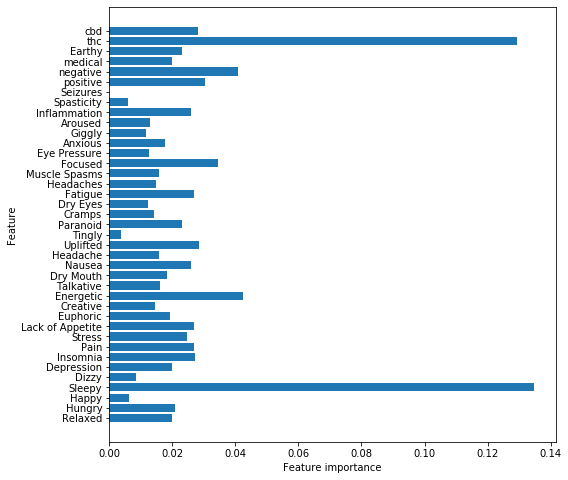

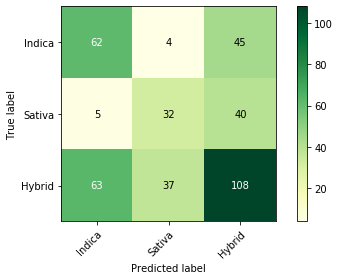

In [146]:
#Random Forest Baseline (accuracy: 0.49)
tree_clf = DecisionTreeClassifier() 
tree_clf.fit(scaled_data_train, y_train)
y_pred=tree_clf.predict(scaled_data_test)
# roc(tree_clf,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, pd.DataFrame(X_train), X_test, y_train, y_test)
print_metrics(y_pred,y_test)
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])




Precision Score: [0.54954955 0.46753247 0.75      ]
Recall Score: [0.69318182 0.5625     0.63934426]
Accuracy Score: 0.6388888888888888
F1 Score: [0.61306533 0.5106383  0.69026549]
              precision    recall  f1-score   support

      indica       0.69      0.55      0.61       111
      satica       0.56      0.47      0.51        77
      hybrid       0.64      0.75      0.69       208

    accuracy                           0.64       396
   macro avg       0.63      0.59      0.60       396
weighted avg       0.64      0.64      0.63       396

Predicted   0   1    2  All
True                       
0          61   3   47  111
1           0  36   41   77
2          27  25  156  208
All        88  64  244  396


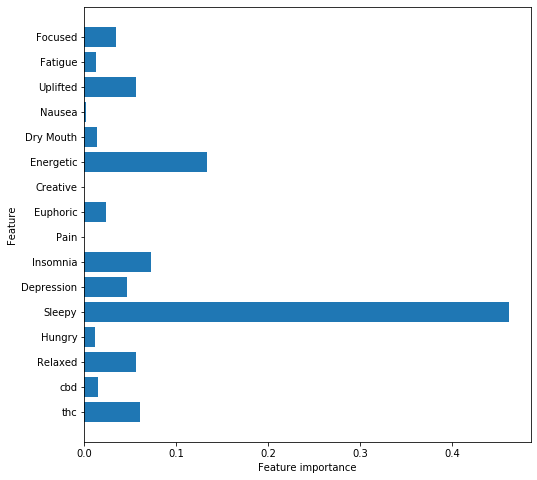

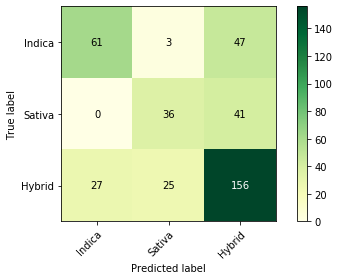

In [147]:
#Random Forest w Selected features (accuracy: 0.63)
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(trainx, y_train)
y_preds=tree_clf.predict(testx)
# roc(tree_clf,trainx,testx,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, trainx,  X_test, y_train, y_test)
print_metrics(y_preds,y_test)
print(classification_report(y_test,y_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_preds,['Indica','Sativa','Hybrid'])


Precision Score: [0.13513514 0.02597403 0.97596154]
Recall Score: [0.625      0.33333333 0.55464481]
Accuracy Score: 0.5555555555555556
F1 Score: [0.22222222 0.04819277 0.70731707]
              precision    recall  f1-score   support

      indica       0.62      0.14      0.22       111
      satica       0.33      0.03      0.05        77
      hybrid       0.55      0.98      0.71       208

    accuracy                           0.56       396
   macro avg       0.50      0.38      0.33       396
weighted avg       0.53      0.56      0.44       396

Predicted   0  1    2  All
True                      
0          15  2   94  111
1           6  2   69   77
2           3  2  203  208
All        24  6  366  396


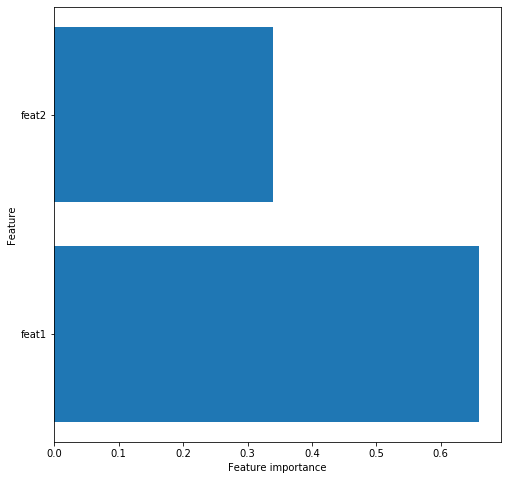

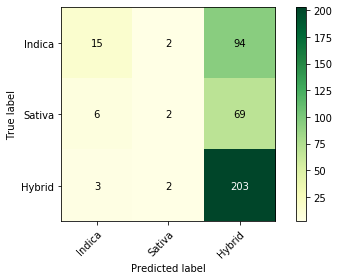

In [148]:
#Random forest with PCA (accuracy: 0.5262)
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(Xptrain, yptrain)
y_preds=tree_clf.predict(Xptest)
# roc(tree_clf,df_train,df_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, Xptrain, Xptest, yptrain, yptest)
print_metrics(y_preds,yptest)
print(classification_report(yptest,y_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_preds,['Indica','Sativa','Hybrid'])

Training Score: 0.6672283066554339
Testing Score: 0.6111111111111112
Precision Score: [0.55855856 0.09090909 0.83173077]
Recall Score: [0.64583333 0.875      0.59246575]
Accuracy Score: 0.6111111111111112
F1 Score: [0.59903382 0.16470588 0.692     ]
              precision    recall  f1-score   support

      indica       0.65      0.56      0.60       111
      satica       0.88      0.09      0.16        77
      hybrid       0.59      0.83      0.69       208

    accuracy                           0.61       396
   macro avg       0.70      0.49      0.49       396
weighted avg       0.66      0.61      0.56       396

Predicted   0  1    2  All
True                      
0          62  0   49  111
1           0  7   70   77
2          34  1  173  208
All        96  8  292  396


<Figure size 720x360 with 0 Axes>

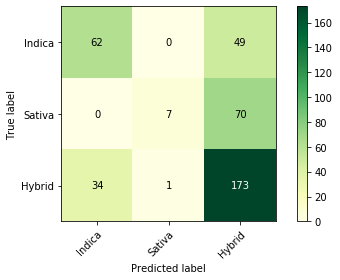

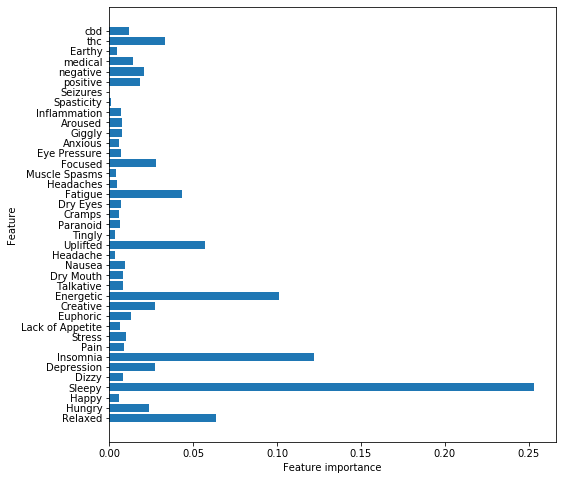

In [149]:
#forest with different parameters (accuracy: 0.60)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(scaled_data_train, y_train)
y_pred=forest.predict(scaled_data_test)
train_score=forest.score(scaled_data_train,y_train)
test_score=forest.score(scaled_data_test,y_test)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))
print_metrics(y_pred,y_test)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
plot_feature_importances(forest,pd.DataFrame(X_train),X_test, y_train, y_test)

Training Score: 0.6807076663858467
Testing Score: 0.6287878787878788
              precision    recall  f1-score   support

      indica       0.67      0.59      0.62       111
      satica       0.63      0.25      0.36        77
      hybrid       0.61      0.79      0.69       208

    accuracy                           0.63       396
   macro avg       0.64      0.54      0.56       396
weighted avg       0.63      0.63      0.61       396

Precision Score: [0.58558559 0.24675325 0.79326923]
Recall Score: [0.67010309 0.63333333 0.6133829 ]
Accuracy Score: 0.6287878787878788
F1 Score: [0.625      0.35514019 0.6918239 ]
Predicted   0   1    2  All
True                       
0          65   0   46  111
1           0  19   58   77
2          32  11  165  208
All        97  30  269  396


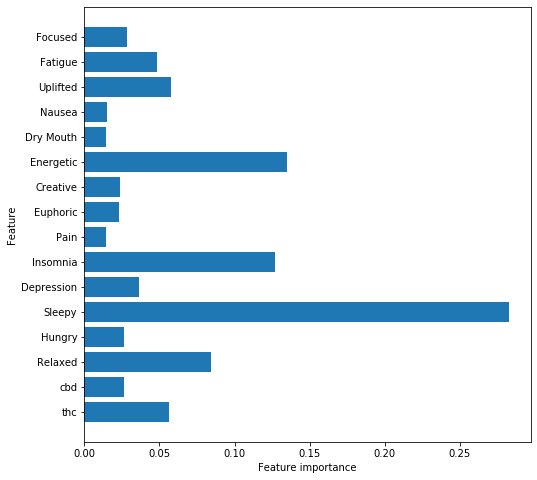

<Figure size 720x432 with 0 Axes>

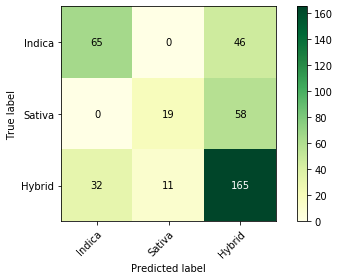

In [150]:
#forest with different parameters and selected features (accuracy: 0.6715)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(trainx, y_train)
y_pred=forest.predict(testx)
train_score=forest.score(trainx,y_train)
test_score=forest.score(testx,y_test)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
print_metrics(y_pred,y_test)
plot_feature_importances(forest,pd.DataFrame(trainx), X_test, y_train, y_test)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

Training Score: 0.5754001684919966
Testing Score: 0.5631313131313131
              precision    recall  f1-score   support

      indica       0.89      0.15      0.26       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.55      0.99      0.70       208

    accuracy                           0.56       396
   macro avg       0.48      0.38      0.32       396
weighted avg       0.54      0.56      0.44       396

Precision Score: [0.15315315 0.         0.99038462]
Recall Score: [0.89473684 0.         0.5464191 ]
Accuracy Score: 0.5631313131313131
F1 Score: [0.26153846 0.         0.7042735 ]
Predicted   0    2  All
True                   
0          17   94  111
1           0   77   77
2           2  206  208
All        19  377  396


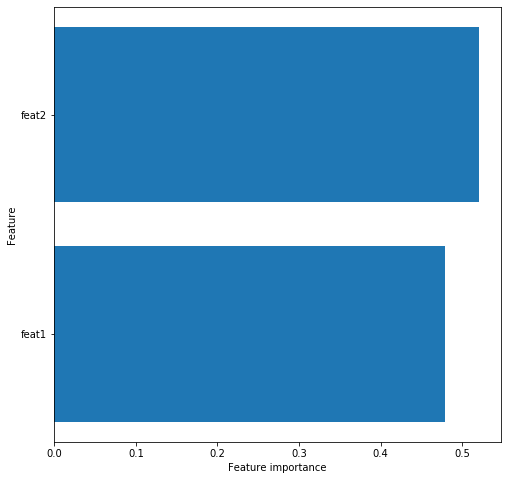

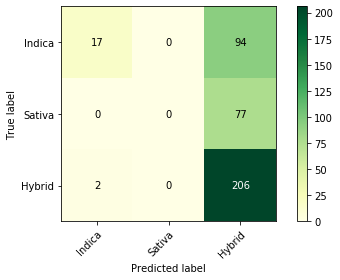

In [151]:
#forest with different parameters and PCA (accuracy: 0.5681)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(Xptrain, yptrain)
y_pred=forest.predict(Xptest)
train_score=forest.score(Xptrain,yptrain)
test_score=forest.score(Xptest,yptest)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))
print(classification_report(yptest,y_pred,target_names=['indica','sativa','hybrid']))
print_metrics(y_pred,yptest)
plot_feature_importances(forest,pd.DataFrame(Xptrain), Xptest, yptrain, yptest)
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])


Mean Cross Validation Score: 58.72%
Mean Training Score: 65.94%
Mean Testing Score: 63.89%
Best Parameter Combination Found During Grid Search:
Precision Score: [0.63265306 0.65625    0.61278195]
Recall Score: [0.55855856 0.27272727 0.78365385]
Accuracy Score: 0.6212121212121212
F1 Score: [0.59330144 0.3853211  0.68776371]
              precision    recall  f1-score   support

      indica       0.63      0.56      0.59       111
      satica       0.66      0.27      0.39        77
      hybrid       0.61      0.78      0.69       208

    accuracy                           0.62       396
   macro avg       0.63      0.54      0.56       396
weighted avg       0.63      0.62      0.60       396

Predicted   0   1    2  All
True                       
0          62   0   49  111
1           2  21   54   77
2          34  11  163  208
All        98  32  266  396
Training Score:  0.6992417860151643
Testing Score:  0.6212121212121212


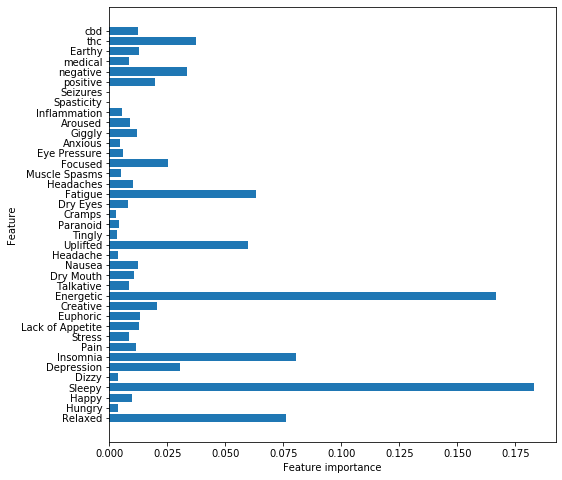

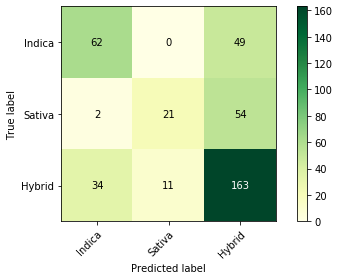

In [152]:
#Grid search forest (criterion='gini', max_depth=6,min_samples_leaf=5,min_samples_split=5,n_estimators=8, accuracy: 0.6512)
dt_clf=RandomForestClassifier()
dt_cv_score=cross_val_score(dt_clf, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators':[1,2,3,4,5,6,7,8,9],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

forest3 = RandomForestClassifier(criterion='gini', max_depth=6,min_samples_leaf=5,min_samples_split=5,n_estimators=8)
forest3.fit(scaled_data_train, y_train)
y_pred=forest3.predict(scaled_data_test)
y_pred=forest3.predict(scaled_data_test)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_feature_importances(forest3,pd.DataFrame(X_train),X_test, y_train, y_test)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print("Training Score: ",forest3.score(scaled_data_train,y_train))
print("Testing Score: ",forest3.score(scaled_data_test,y_test))



Mean Cross Validation Score: 59.47%
Mean Training Score: 66.05%
Mean Testing Score: 64.39%
Best Parameter Combination Found During Grid Search:
Precision Score: [0.67368421 1.         0.59731544]
Recall Score: [0.57657658 0.03896104 0.85576923]
Accuracy Score: 0.6186868686868687
F1 Score: [0.62135922 0.075      0.70355731]
              precision    recall  f1-score   support

      indica       0.67      0.58      0.62       111
      satica       1.00      0.04      0.08        77
      hybrid       0.60      0.86      0.70       208

    accuracy                           0.62       396
   macro avg       0.76      0.49      0.47       396
weighted avg       0.70      0.62      0.56       396

Predicted   0  1    2  All
True                      
0          64  0   47  111
1           1  3   73   77
2          30  0  178  208
All        95  3  298  396
Training Score:  0.6436394271272114
Testing Score:  0.6186868686868687


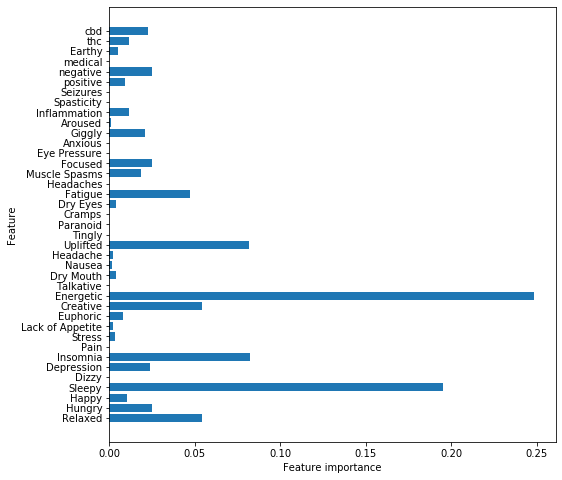

<Figure size 720x360 with 0 Axes>

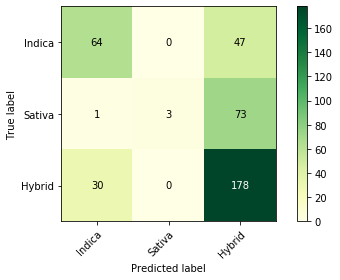

In [156]:
#Grid Search Forest selected features (criterion='gini', max_depth=4,min_samples_leaf=5,min_samples_split=10,n_estimators=5 accuracy: 0.6541)
dt_clf=RandomForestClassifier()
dt_cv_score=cross_val_score(dt_clf, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(trainx, y_train)
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(testx, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
forest3 = RandomForestClassifier(criterion='gini', max_depth=4,min_samples_leaf=5,min_samples_split=10,n_estimators=5)
forest3.fit(scaled_data_train, y_train)
y_pred=forest3.predict(scaled_data_test)
y_pred=forest3.predict(scaled_data_test)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_feature_importances(forest3,pd.DataFrame(X_train), X_test, y_train, y_test)
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print("Training Score: ",forest3.score(scaled_data_train,y_train))
print("Testing Score: ",forest3.score(scaled_data_test,y_test))

              precision    recall  f1-score   support

      indica       0.62      0.62      0.62       111
      satica       0.73      0.35      0.47        77
      hybrid       0.63      0.75      0.69       208

    accuracy                           0.64       396
   macro avg       0.66      0.58      0.59       396
weighted avg       0.65      0.64      0.63       396

Predicted    0   1    2  All
True                        
0           69   0   42  111
1            1  27   49   77
2           41  10  157  208
All        111  37  248  396
Precision Score: [0.62162162 0.72972973 0.63306452]
Recall Score: [0.62162162 0.35064935 0.75480769]
Accuracy Score: 0.6388888888888888
F1 Score: [0.62162162 0.47368421 0.68859649]


<Figure size 720x432 with 0 Axes>

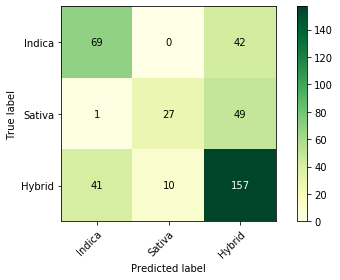

In [157]:
#SVM Baseline (accuracy: 0.6715)
clf = svm.SVC(kernel='linear')
clf.fit(scaled_data_train, y_train)
y_pred=clf.predict(scaled_data_test)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print_metrics(y_test,y_pred)

              precision    recall  f1-score   support

      indica       0.00      0.00      0.00       111
      satica       0.00      0.00      0.00        77
      hybrid       0.53      1.00      0.69       208

    accuracy                           0.53       396
   macro avg       0.18      0.33      0.23       396
weighted avg       0.28      0.53      0.36       396

Predicted    2  All
True               
0          111  111
1           77   77
2          208  208
All        396  396
Precision Score: [0.         0.         0.52525253]
Recall Score: [0. 0. 1.]
Accuracy Score: 0.5252525252525253
F1 Score: [0.         0.         0.68874172]


<Figure size 720x432 with 0 Axes>

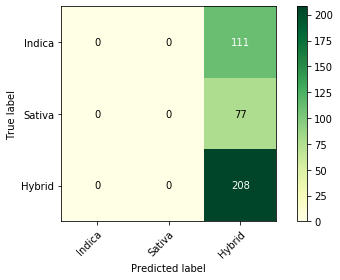

In [158]:
#SVM PCA (accuracy: 0.5436)
clf = svm.SVC(kernel='linear')
clf.fit(Xptrain, yptrain)
y_pred=clf.predict(Xptest)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
plt.figure(figsize=(10,6))
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])
print_metrics(yptest,y_pred)

              precision    recall  f1-score   support

      indica       0.61      0.65      0.63       111
      satica       0.65      0.60      0.62        77
      hybrid       0.67      0.66      0.66       208

    accuracy                           0.64       396
   macro avg       0.64      0.63      0.64       396
weighted avg       0.64      0.64      0.64       396

              precision    recall  f1-score   support

      indica       0.53      0.75      0.62       111
      satica       0.50      0.73      0.59        77
      hybrid       0.70      0.42      0.52       208

    accuracy                           0.57       396
   macro avg       0.57      0.63      0.58       396
weighted avg       0.61      0.57      0.56       396

Predicted    0    1    2  All
True                         
0           83    9   19  111
1            2   56   19   77
2           73   48   87  208
All        158  113  125  396
Precision Score: [0.52531646 0.49557522 0.696     ]
Recall

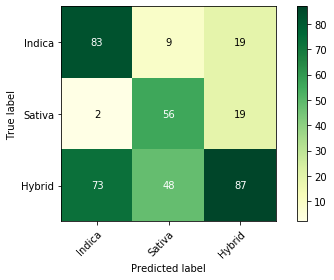

In [159]:
#Naive Bayes Baseline
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(scaled_data_train, y_train)
y_pred=clf.predict(scaled_data_test)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
clf=GaussianNB()
clf.fit(scaled_data_train, y_train)
y_pred=clf.predict(scaled_data_test)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
scaled_data_train=pd.DataFrame(scaled_data_train)
scaled_data_test=pd.DataFrame(scaled_data_test)
print_metrics(y_test,y_pred)

In [179]:
confusion_matrix(y_test.values.argmax(), y_pred.argmax())

TypeError: Singleton array 0 cannot be considered a valid collection.

In [182]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)

ValueError: X has 39 features per sample; expecting 2

In [180]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ValueError: multiclass format is not supported